In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt           
import plotly.express as px
import matplotlib.pyplot as plt

In [2]:
data_base = pd.read_csv('/content/heart.csv')

In [3]:
data_base

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


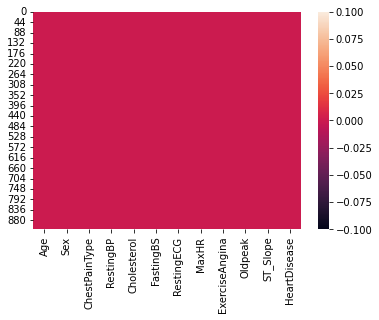

In [4]:
sns.heatmap(data_base.isnull());

In [5]:
data_base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [6]:
fig=px.histogram(data_base,x='ChestPainType',color='HeartDisease',template='plotly_dark')
fig.show()

In [7]:
fig=px.histogram(data_base,x='Age',color='HeartDisease',template='plotly_dark')
fig.show()

In [8]:
fig=px.histogram(data_base,x='Sex',color='HeartDisease',template='plotly_dark')
fig.show()

In [9]:
fig=px.histogram(data_base,x='Sex',color='ExerciseAngina',template='plotly_dark')
fig.show()

In [10]:
from sklearn.preprocessing import LabelEncoder

label=LabelEncoder()

data_base['Sex']=label.fit_transform(data_base['Sex'])
data_base['RestingECG']=label.fit_transform(data_base['RestingECG'])
data_base['ChestPainType']=label.fit_transform(data_base['ChestPainType'])
data_base['ExerciseAngina']=label.fit_transform(data_base['ExerciseAngina'])
data_base['ST_Slope']=label.fit_transform(data_base['ST_Slope'])

data_base.head()


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0


In [11]:
data_base.ChestPainType.unique()

array([1, 2, 0, 3])

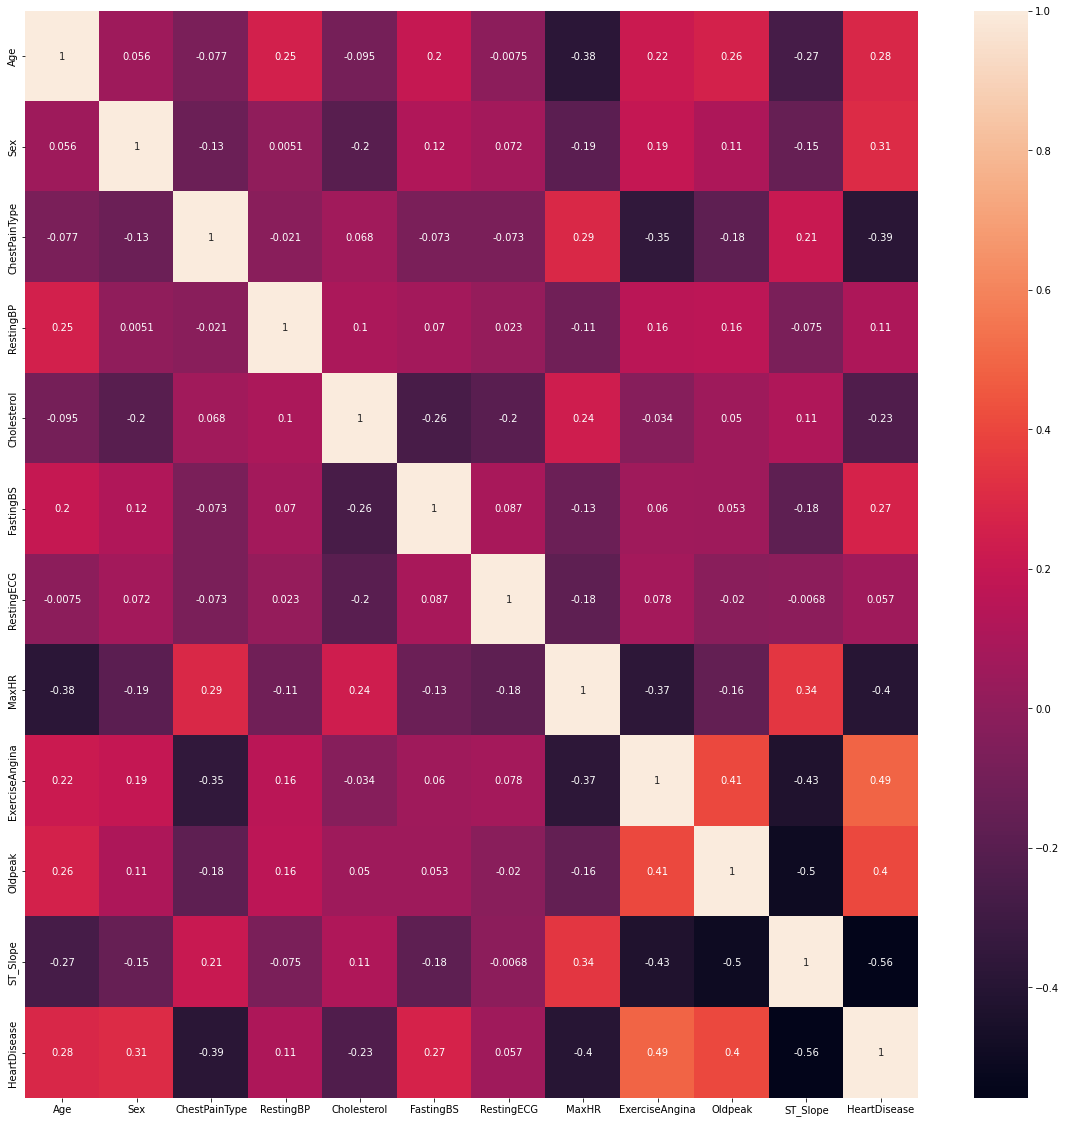

In [12]:
correlations = data_base.corr()
f, ax = plt.subplots(figsize = (20,20))
sns.heatmap(correlations, annot=True)
correlations.round(2);

O gráfico de correlçaão nos deixa um grande alerta de o quanto os exercicios são importantes para o a saúde do nosso coração.

DIVISÃO ENTRE PREVISORES E CLASSE - PRE PROCESSAMENTO

In [13]:
X_base = data_base.iloc[:, 0:11]

In [14]:
y_base = data_base.iloc[:, 11]
print(y_base)

0      0
1      1
2      0
3      1
4      0
      ..
913    1
914    1
915    1
916    1
917    0
Name: HeartDisease, Length: 918, dtype: int64


In [15]:
df_X = list(X_base.columns)
print(df_X)

['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS', 'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope']


In [16]:
X_base = X_base.values
y_base = y_base.values

In [17]:
X_base

array([[40. ,  1. ,  1. , ...,  0. ,  0. ,  2. ],
       [49. ,  0. ,  2. , ...,  0. ,  1. ,  1. ],
       [37. ,  1. ,  1. , ...,  0. ,  0. ,  2. ],
       ...,
       [57. ,  1. ,  0. , ...,  1. ,  1.2,  1. ],
       [57. ,  0. ,  1. , ...,  0. ,  0. ,  1. ],
       [38. ,  1. ,  2. , ...,  0. ,  0. ,  2. ]])

In [18]:
y_base

array([0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,

In [19]:
from sklearn.preprocessing import StandardScaler  
scaler_base = StandardScaler()

X_base = scaler_base.fit_transform(X_base) 

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_base_treinamento, X_base_teste, y_base_treinamento, y_base_teste = train_test_split(X_base, y_base, test_size = 0.25, random_state = 0)

In [22]:
X_base_teste.shape 

(230, 11)

In [23]:
X_base_treinamento.shape 

(688, 11)

In [24]:
y_base_treinamento.shape

(688,)

In [25]:
X_base_teste.shape, y_base_teste.shape

((230, 11), (230,))

SALVANDO A BASE DE DADOS PARA TESTAR NOS ALGORITIMOS

ARVORE DE DECISÃO

In [26]:
from sklearn.tree import DecisionTreeClassifier

In [27]:
arvore_base = DecisionTreeClassifier(criterion='entropy', random_state = 0)
arvore_base.fit(X_base_treinamento, y_base_treinamento)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [28]:
previsoes = arvore_base.predict(X_base_teste)
previsoes

array([1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1])

In [29]:
y_base_teste

array([1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 1])

In [30]:
from sklearn.metrics import accuracy_score, classification_report

In [31]:
accuracy_score(y_base_teste, previsoes)

0.8260869565217391

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning:

The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.



0.8260869565217391

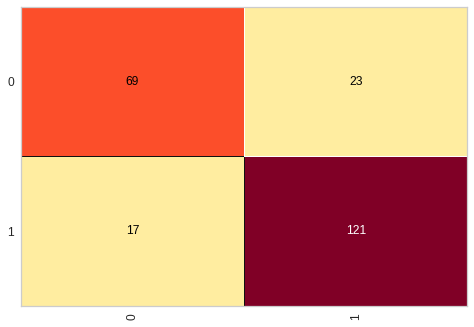

In [32]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(arvore_base)
cm.fit(X_base_treinamento, y_base_treinamento)
cm.score(X_base_teste, y_base_teste)

In [33]:
print(classification_report(y_base_teste, previsoes))

              precision    recall  f1-score   support

           0       0.80      0.75      0.78        92
           1       0.84      0.88      0.86       138

    accuracy                           0.83       230
   macro avg       0.82      0.81      0.82       230
weighted avg       0.83      0.83      0.83       230



RANDOM FOREST

In [34]:
from sklearn.ensemble import RandomForestClassifier    

In [35]:
random_forest_base = RandomForestClassifier(n_estimators=40, criterion='entropy', random_state = 0)
random_forest_base.fit(X_base_treinamento, y_base_treinamento)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=40,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [36]:
previsoes = random_forest_base.predict(X_base_teste)     
previsoes

array([1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1])

In [37]:
y_base_teste 

array([1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 1])

In [38]:
accuracy_score(y_base_teste, previsoes)

0.8608695652173913

0.8608695652173913

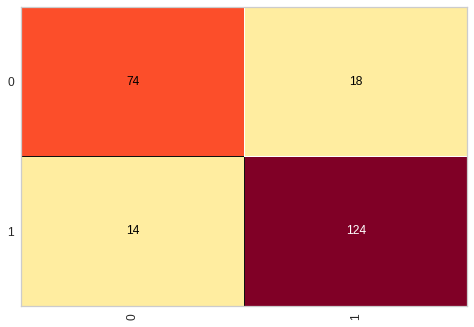

In [39]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(random_forest_base)
cm.fit(X_base_treinamento, y_base_treinamento)
cm.score(X_base_teste, y_base_teste)                    

In [40]:
print(classification_report(y_base_teste, previsoes))

              precision    recall  f1-score   support

           0       0.84      0.80      0.82        92
           1       0.87      0.90      0.89       138

    accuracy                           0.86       230
   macro avg       0.86      0.85      0.85       230
weighted avg       0.86      0.86      0.86       230



ORANGE

In [41]:
!pip install Orange3

In [42]:
import Orange

In [43]:
pip install psycopg2-binary

In [44]:
data_base_O = pd.read_csv('/content/heart.csv')

In [45]:
data_base_O

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [46]:
data_Orange = data_base_O.rename(columns={'HeartDisease': 'c#HeartDisease'})

In [47]:
data_Orange

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,c#HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [48]:
data_Orange.to_csv('data_Orange.csv')

In [49]:
data_Orange = pd.read_csv('/content/data_Orange.csv')
data_Orange

,Unnamed: 0,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,c#HeartDisease
0,0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [50]:
data_Orange = Orange.data.Table('data_Orange.csv')

In [51]:
data_Orange.domain 

[Feature 1, Age, Sex, ChestPainType, RestingBP, Cholesterol, FastingBS, RestingECG, MaxHR, ExerciseAngina, Oldpeak, ST_Slope | HeartDisease]

In [52]:
base_divisao = Orange.evaluation.testing.sample(data_Orange, n = 0.25)  

In [53]:
base_divisao

([[660, 58, M, NAP, 140, ... | 0],
  [831, 63, F, NAP, 135, ... | 0],
  [254, 55, M, ASY, 145, ... | 1],
  [778, 58, M, ASY, 128, ... | 1],
  [86, 65, M, ASY, 170, ... | 1],
  ...
 ], [[426, 56, M, ATA, 126, ... | 0],
  [276, 51, M, NAP, 135, ... | 1],
  [290, 48, M, NAP, 110, ... | 0],
  [110, 59, F, ATA, 130, ... | 0],
  [383, 38, F, ASY, 110, ... | 1],
  ...
 ])

In [54]:
base_divisao[0]

[[660, 58, M, NAP, 140, ... | 0],
 [831, 63, F, NAP, 135, ... | 0],
 [254, 55, M, ASY, 145, ... | 1],
 [778, 58, M, ASY, 128, ... | 1],
 [86, 65, M, ASY, 170, ... | 1],
 ...
]

In [55]:
base_treinamento = base_divisao[1]    # Aqui criamos duas váriaveis, a base de treinamento irá receber a base dividida na posição 1;
base_teste = base_divisao[0]

In [56]:
len(base_treinamento), len(base_teste)

(689, 229)

In [57]:
cn2 = Orange.classification.rules.CN2Learner()      # Aqui novamente a função do orange para o treinamento e teste;
regras_base = cn2(base_treinamento)               # Váriavel criada com o incorporação da função;

In [58]:
for regras in regras_base.rule_list:       # Função for para leitura e aplicação da função;
  print(regras)

IF Cholesterol<=85.0 AND ChestPainType==TA THEN HeartDisease=1 
IF Cholesterol<=85.0 AND Cholesterol>=85.0 THEN HeartDisease=0 
IF Cholesterol<=100.0 AND Age>=74.0 THEN HeartDisease=0 
IF Cholesterol<=100.0 AND Cholesterol>=100.0 THEN HeartDisease=0 
IF Cholesterol<=126.0 AND RestingECG==LVH THEN HeartDisease=1 
IF ExerciseAngina!=N AND Feature 1>=835.0 THEN HeartDisease=1 
IF ST_Slope==Up AND ChestPainType==TA THEN HeartDisease=0 
IF Cholesterol<=157.0 AND ChestPainType==TA THEN HeartDisease=1 
IF ST_Slope!=Up AND Age>=75.0 THEN HeartDisease=0 
IF ST_Slope!=Up AND Age>=70.0 THEN HeartDisease=1 
IF ST_Slope!=Up AND Oldpeak>=3.6 THEN HeartDisease=1 
IF ST_Slope==Up AND RestingBP>=185.0 THEN HeartDisease=1 
IF Sex==F AND ChestPainType==TA THEN HeartDisease=0 
IF ST_Slope==Up AND Feature 1<=295.0 AND Sex==F THEN HeartDisease=0 
IF ChestPainType==ATA AND RestingBP>=180.0 THEN HeartDisease=1 
IF ST_Slope==Up AND Feature 1<=295.0 AND ChestPainType!=ASY THEN HeartDisease=0 
IF Cholesterol<=15

In [59]:
previsoes = Orange.evaluation.testing.TestOnTestData(base_treinamento, base_teste, [lambda testdata: regras_base])  # Agora as previsões na base de dados de teste;

In [60]:
previsoes

In [61]:
Orange.evaluation.CA(previsoes)

array([0.76855895])

# Majority learner

Ele é apenas um classificador e não um machine learning apenas utilizado para classificação, ele é utilizado para fazer avaliação de outros algoritimos;

Por exemplo, che um cliente com um perfil, através desse algoritimo por ter perfil parecido ele é colocado naquela classificação;


Esse algoritimo para classificação é interessante e importante, se tivermos algum algoritimo com treino que acerte menos que os 85% que foram calculados aqui seria mais interessante utilzar o classificador ao invés do learning;

Essa seria a nossa linha base, os algoritimos de inteligência teria que passar esse nosso classificador;

Ele é muito utilizado para fazermos a avaliação dos outros algortimos



In [62]:
base_majory = Orange.data.Table('data_Orange.csv')

In [63]:
data_Orange.domain 

[Feature 1, Age, Sex, ChestPainType, RestingBP, Cholesterol, FastingBS, RestingECG, MaxHR, ExerciseAngina, Oldpeak, ST_Slope | HeartDisease]

In [64]:
majority = Orange.classification.MajorityLearner()

In [65]:
previsoes = Orange.evaluation.testing.TestOnTestData(base_majory, base_majory, [majority])

In [66]:
Orange.evaluation.CA(previsoes)

array([0.55337691])

In [67]:
for registro in base_majory:
  print(registro.get_class())

0
1
0
1
0
0
0
0
1
0
0
1
0
1
0
0
1
0
1
1
0
0
0
1
0
0
0
0
0
0
1
0
1
1
0
0
1
0
0
0
0
1
0
0
1
0
0
0
0
1
1
1
0
0
0
0
1
1
0
1
0
0
0
1
0
0
0
0
1
0
1
0
1
0
1
0
1
0
0
1
0
0
1
0
1
1
1
0
1
0
0
0
0
1
0
1
0
0
0
0
1
0
1
1
1
0
0
0
0
0
0
1
0
0
0
1
1
1
0
1
1
0
0
1
0
0
0
0
0
0
0
1
1
1
0
1
0
0
1
1
1
1
1
0
1
0
0
0
0
1
0
0
0
0
0
1
1
0
1
0
1
1
0
0
0
1
1
0
0
0
0
0
0
0
1
1
1
0
0
0
1
0
1
0
0
1
0
1
0
1
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
1
0
1
1
1
0
0
1
0
1
0
0
0
1
1
0
0
0
1
0
1
0
0
0
0
0
0
0
0
1
1
1
1
0
1
1
0
1
0
1
1
1
1
1
1
0
0
1
0
0
0
0
0
0
0
1
1
1
0
1
0
1
0
0
0
1
0
0
0
1
1
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1
0
1
1
1
1
1
0
1
1
0
1
1
1
0
1
1
1
1
1
1
1
1
1
1
1
0
1
1
1
1
1
0
1
1
1
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
1
1
0
0
1
0
1
1
0
1
1
1
1
0
1
1
0
0
1
1
1
0
1
1
1
1
1
1
1
1
1
1
1
1
1
0
1
0
1
1
1
0
1
1
1
0
1
0
1
0
1
0
1
1
1
1
0
1
0
1
1
1
1
1
1
1
1
1
0
1
0
1
1
1
1
1
1
1
0
1
1
1


In [68]:
from collections import Counter
Counter(str(registro.get_class()) for registro in base_majory) 

Counter({'0': 410, '1': 508})

In [69]:
# como a maioria dos registros são da classe 1, todos os registros novos seriam classificaos com 1, pois é a maioria 55%, se tivermos uma aprendizagem com menos utilizariamos essa, mas não é o caso.

# KNN


Nesse modelo não será necessário realizarmos o treinamento, pois ele não gera um modelo, ele básicamente faz o cáculo da distância entre os registros

In [70]:
from sklearn.neighbors import KNeighborsClassifier

In [71]:
X_base_treinamento.shape, y_base_treinamento.shape

((688, 11), (688,))

In [72]:
X_base_teste.shape, y_base_teste.shape

((230, 11), (230,))

In [73]:
knn_base = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p = 2)
knn_base.fit(X_base_treinamento, y_base_treinamento)  

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [74]:
previsoes = knn_base.predict(X_base_teste)
previsoes

array([1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1])

In [75]:
y_base_teste

array([1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 1])

In [76]:

accuracy_score(y_base_teste, previsoes) 

0.8652173913043478

0.8652173913043478

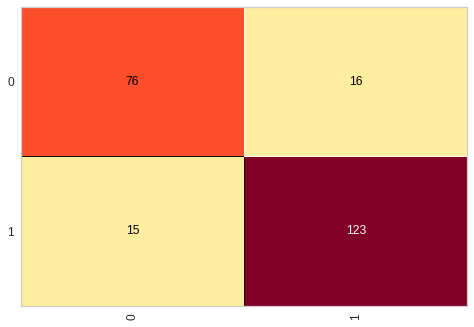

In [77]:
cm = ConfusionMatrix(knn_base)
cm.fit(X_base_treinamento, y_base_treinamento)
cm.score(X_base_teste, y_base_teste)

In [78]:
print(classification_report(y_base_teste, previsoes))

              precision    recall  f1-score   support

           0       0.84      0.83      0.83        92
           1       0.88      0.89      0.89       138

    accuracy                           0.87       230
   macro avg       0.86      0.86      0.86       230
weighted avg       0.87      0.87      0.87       230



# REGRESSÃO LOGISTICA

In [79]:
from sklearn.linear_model import LogisticRegression

In [80]:
logistic_base = LogisticRegression(random_state=1)
logistic_base.fit(X_base_treinamento, y_base_treinamento)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=1, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [81]:
logistic_base.intercept_

array([0.4330852])

In [82]:
logistic_base.coef_

array([[ 0.04860904,  0.56207096, -0.59976547,  0.12257929, -0.22057517,
         0.53501967, -0.24123468, -0.29649344,  0.53231068,  0.39059905,
        -1.13886621]])

In [83]:
previsoes = logistic_base.predict(X_base_teste)
previsoes

array([1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1])

In [84]:
y_base_teste

array([1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 1])

In [85]:
accuracy_score(y_base_teste, previsoes)

0.8304347826086956

0.8304347826086956

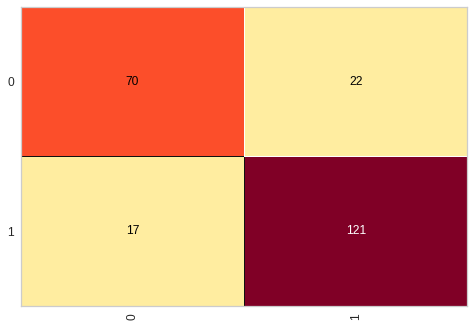

In [86]:
cm = ConfusionMatrix(logistic_base)
cm.fit(X_base_treinamento, y_base_treinamento)
cm.score(X_base_teste, y_base_teste)

In [87]:
print(classification_report(y_base_teste, previsoes))

              precision    recall  f1-score   support

           0       0.80      0.76      0.78        92
           1       0.85      0.88      0.86       138

    accuracy                           0.83       230
   macro avg       0.83      0.82      0.82       230
weighted avg       0.83      0.83      0.83       230



# **SVM**

In [88]:
from sklearn.svm import SVC

In [89]:
svm_base = SVC(kernel='rbf', random_state=1, C = 2.0)              
svm_base.fit(X_base_treinamento, y_base_treinamento)

SVC(C=2.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=1, shrinking=True, tol=0.001,
    verbose=False)

In [90]:
previsoes = svm_base.predict(X_base_teste)
previsoes

array([1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1])

In [91]:
y_base_teste

array([1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 1])

In [92]:

accuracy_score(y_base_teste, previsoes)

0.8608695652173913

0.8608695652173913

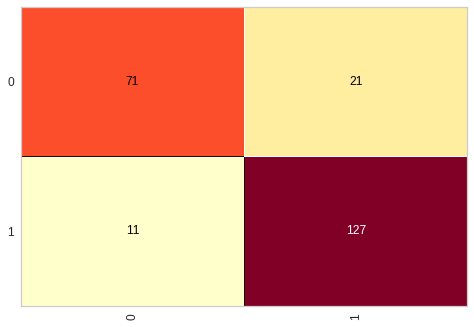

In [93]:
cm = ConfusionMatrix(svm_base)
cm.fit(X_base_treinamento, y_base_treinamento)
cm.score(X_base_teste, y_base_teste)

In [94]:
print(classification_report(y_base_teste, previsoes))

              precision    recall  f1-score   support

           0       0.87      0.77      0.82        92
           1       0.86      0.92      0.89       138

    accuracy                           0.86       230
   macro avg       0.86      0.85      0.85       230
weighted avg       0.86      0.86      0.86       230



# REDE NEURAL

In [95]:
from sklearn.neural_network import MLPClassifier

In [96]:
X_base_treinamento.shape, y_base_treinamento.shape

((688, 11), (688,))

In [97]:
X_base_teste.shape, y_base_teste.shape

((230, 11), (230,))

In [98]:
rede_neural_base = MLPClassifier(max_iter=1800, verbose=True, tol=0.00000100, 
                                   solver = 'adam', activation = 'relu',
                                    hidden_layer_sizes = (20,20)) 
rede_neural_base.fit(X_base_treinamento, y_base_treinamento)

Iteration 1, loss = 0.74452688
Iteration 2, loss = 0.71262995
Iteration 3, loss = 0.68296279
Iteration 4, loss = 0.65714542
Iteration 5, loss = 0.63538045
Iteration 6, loss = 0.61409362
Iteration 7, loss = 0.59536374
Iteration 8, loss = 0.57732703
Iteration 9, loss = 0.55984052
Iteration 10, loss = 0.54345205
Iteration 11, loss = 0.52741429
Iteration 12, loss = 0.51240062
Iteration 13, loss = 0.49801396
Iteration 14, loss = 0.48388408
Iteration 15, loss = 0.47104903
Iteration 16, loss = 0.45859659
Iteration 17, loss = 0.44712415
Iteration 18, loss = 0.43594879
Iteration 19, loss = 0.42613211
Iteration 20, loss = 0.41700891
Iteration 21, loss = 0.40851527
Iteration 22, loss = 0.40086959
Iteration 23, loss = 0.39399686
Iteration 24, loss = 0.38794568
Iteration 25, loss = 0.38194408
Iteration 26, loss = 0.37687842
Iteration 27, loss = 0.37229025
Iteration 28, loss = 0.36807607
Iteration 29, loss = 0.36438706
Iteration 30, loss = 0.36060262
Iteration 31, loss = 0.35783549
Iteration 32, los

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (1800) reached and the optimization hasn't converged yet.



MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(20, 20), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=1800,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=1e-06, validation_fraction=0.1, verbose=True,
              warm_start=False)

In [99]:
previsoes = rede_neural_base.predict(X_base_teste)
previsoes

array([1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1])

In [100]:
y_base_teste

array([1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 1])

In [101]:

accuracy_score(y_base_teste, previsoes)

0.8217391304347826

Iteration 1, loss = 0.87255622
Iteration 2, loss = 0.82776611
Iteration 3, loss = 0.78763008
Iteration 4, loss = 0.75173238
Iteration 5, loss = 0.72031871
Iteration 6, loss = 0.69096911
Iteration 7, loss = 0.66383653
Iteration 8, loss = 0.63815688
Iteration 9, loss = 0.61450852
Iteration 10, loss = 0.59154657
Iteration 11, loss = 0.56892767
Iteration 12, loss = 0.54732633
Iteration 13, loss = 0.52692713
Iteration 14, loss = 0.50686052
Iteration 15, loss = 0.48877505
Iteration 16, loss = 0.47144884
Iteration 17, loss = 0.45599725
Iteration 18, loss = 0.44112063
Iteration 19, loss = 0.42846510
Iteration 20, loss = 0.41691675
Iteration 21, loss = 0.40687826
Iteration 22, loss = 0.39812636
Iteration 23, loss = 0.39063135
Iteration 24, loss = 0.38380850
Iteration 25, loss = 0.37765509
Iteration 26, loss = 0.37237171
Iteration 27, loss = 0.36763110
Iteration 28, loss = 0.36344685
Iteration 29, loss = 0.35942380
Iteration 30, loss = 0.35579215
Iteration 31, loss = 0.35237966
Iteration 32, los

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (1800) reached and the optimization hasn't converged yet.



0.8260869565217391

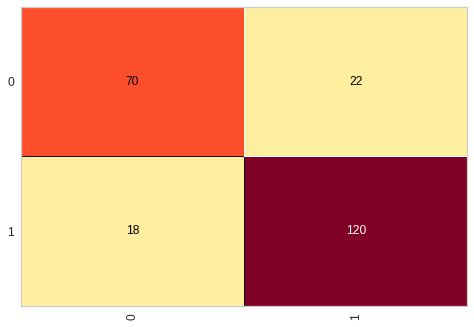

In [102]:
cm = ConfusionMatrix(rede_neural_base)
cm.fit(X_base_treinamento, y_base_treinamento)
cm.score(X_base_teste, y_base_teste)

In [103]:
print(classification_report(y_base_teste, previsoes))

              precision    recall  f1-score   support

           0       0.79      0.76      0.77        92
           1       0.84      0.86      0.85       138

    accuracy                           0.82       230
   macro avg       0.82      0.81      0.81       230
weighted avg       0.82      0.82      0.82       230



# **Tuning dos parâmetros com GridSearch**

In [104]:
from sklearn.model_selection import GridSearchCV          



In [105]:
X_base = np.concatenate((X_base_treinamento, X_base_teste), axis = 0) 
X_base.shape

(918, 11)

In [106]:
y_base = np.concatenate((y_base_treinamento, y_base_teste), axis = 0)
y_base.shape

(918,)

Ávore de Decisão

In [107]:
parametros = {'criterion': ['gini', 'entropy'],
              'splitter': ['best', 'random'],
              'min_samples_split': [2, 5, 10],   
              'min_samples_leaf': [1, 5, 10]}

In [108]:
grid_search = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=parametros)
grid_search.fit(X_base, y_base)
melhores_parametros = grid_search.best_params_
melhor_resultado = grid_search.best_score_
print(melhores_parametros)
print(melhor_resultado)

{'criterion': 'gini', 'min_samples_leaf': 10, 'min_samples_split': 5, 'splitter': 'random'}
0.853967688287004


Random Forest

In [109]:
parametros = {'criterion': ['gini', 'entropy'],      
              'n_estimators': [10, 40, 100, 150],    
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 5, 10]}

In [110]:
grid_search = GridSearchCV(estimator=RandomForestClassifier(), param_grid=parametros)
grid_search.fit(X_base, y_base)
melhores_parametros = grid_search.best_params_
melhor_resultado = grid_search.best_score_
print(melhores_parametros)
print(melhor_resultado)

{'criterion': 'entropy', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}
0.883392729864576


Knn

In [111]:
parametros = {'n_neighbors': [3, 5, 10, 20],      
              'p': [1, 2]}

In [112]:
grid_search = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=parametros)
grid_search.fit(X_base, y_base)
melhores_parametros = grid_search.best_params_
melhor_resultado = grid_search.best_score_
print(melhores_parametros)
print(melhor_resultado)

{'n_neighbors': 10, 'p': 1}
0.8714362081254455


Regressão Logística

In [113]:
parametros = {'tol': [0.0001, 0.00001, 0.000001],
              'C': [1.0, 1.5, 2.0],
              'solver': ['lbfgs', 'sag', 'saga']}

In [114]:
grid_search = GridSearchCV(estimator=LogisticRegression(), param_grid=parametros)
grid_search.fit(X_base, y_base)
melhores_parametros = grid_search.best_params_
melhor_resultado = grid_search.best_score_
print(melhores_parametros)
print(melhor_resultado)

{'C': 1.0, 'solver': 'lbfgs', 'tol': 0.0001}
0.8496436208125445


Svm

In [115]:
parametros = {'tol': [0.001, 0.0001, 0.00001],
              'C': [1.0, 1.5, 2.0],
              'kernel': ['rbf', 'linear', 'poly', 'sigmoid']}

In [116]:
grid_search = GridSearchCV(estimator=SVC(), param_grid=parametros)
grid_search.fit(X_base, y_base)
melhores_parametros = grid_search.best_params_
melhor_resultado = grid_search.best_score_
print(melhores_parametros)
print(melhor_resultado)

{'C': 1.5, 'kernel': 'rbf', 'tol': 0.001}
0.8703314326443335


Redes Neurais

In [117]:
parametros = {'activation': ['relu', 'logistic', 'tahn'],
              'solver': ['adam', 'sgd'],
              'batch_size': [10, 56]}

In [118]:
grid_search = GridSearchCV(estimator=MLPClassifier(), param_grid=parametros)
grid_search.fit(X_base, y_base)
melhores_parametros = grid_search.best_params_
melhor_resultado = grid_search.best_score_

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

In [119]:
print(melhores_parametros)
print(melhor_resultado)

{'activation': 'relu', 'batch_size': 10, 'solver': 'sgd'}
0.8627346162984081


# ** Validação Cruzada / Comparando os Resultados**

In [120]:
from sklearn.model_selection import cross_val_score, KFold


In [121]:
resultados_arvore = []
resultados_random_forest = []
resultados_knn = []
resultados_logistica = []
resultados_svm = []
resultados_rede_neural = []

for i in range(30):
  kfold = KFold(n_splits=10, shuffle=True, random_state=i)
  arvore = DecisionTreeClassifier(criterion='entropy', min_samples_leaf=1, min_samples_split=5, splitter='best')
  scores = cross_val_score(arvore, X_base, y_base, cv = kfold)                                  
  resultados_arvore.append(scores.mean()) 

  random_forest = RandomForestClassifier(criterion = 'entropy', min_samples_leaf = 1, min_samples_split=5, n_estimators = 10)
  scores = cross_val_score(random_forest, X_base, y_base, cv = kfold)
  resultados_random_forest.append(scores.mean())

  knn = KNeighborsClassifier()
  scores = cross_val_score(knn, X_base, y_base, cv = kfold)
  resultados_knn.append(scores.mean())

  logistica = LogisticRegression(C = 1.0, solver = 'lbfgs', tol = 0.0001)
  scores = cross_val_score(logistica, X_base, y_base, cv = kfold)
  resultados_logistica.append(scores.mean())

  svm = SVC(kernel = 'rbf', C = 2.0)
  scores = cross_val_score(svm, X_base, y_base, cv = kfold)
  resultados_svm.append(scores.mean())

  rede_neural = MLPClassifier(activation = 'relu', batch_size = 56, solver = 'adam')
  scores = cross_val_score(rede_neural, X_base, y_base, cv = kfold)
  resultados_rede_neural.append(scores.mean())




/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

In [122]:
resultados = pd.DataFrame({'Arvore': resultados_arvore, 'Random forest': resultados_random_forest,                 
                           'KNN': resultados_knn, 'Logistica': resultados_logistica,
                           'SVM': resultados_svm, 'Rede neural': resultados_rede_neural})
resultados

,Arvore,Random forest,KNN,Logistica,SVM,Rede neural
0,0.795210,0.861634,0.868156,0.855076,0.869231,0.862769
1,0.784257,0.860499,0.857274,0.849689,0.868156,0.845258
2,0.780936,0.857262,0.863784,0.856175,0.872516,0.863808
3,0.796226,0.857370,0.871488,0.850776,0.871488,0.859448
4,0.799510,0.859424,0.859472,0.847504,0.870294,0.860487
5,0.793084,0.861730,0.858445,0.848626,0.867212,0.859556
6,0.793060,0.855148,0.855160,0.852986,0.867093,0.861634
7,0.801720,0.863844,0.869267,0.850788,0.871429,0.858290
8,0.793024,0.856223,0.860595,0.846441,0.873662,0.852950
9,0.786574,0.858361,0.863880,0.846417,0.873650,0.849677


In [123]:
resultados.describe()

,Arvore,Random forest,KNN,Logistica,SVM,Rede neural
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,0.793202,0.859249,0.864260,0.850872,0.872324,0.858156
std,0.008578,0.005157,0.004080,0.003490,0.004068,0.004737
min,0.776613,0.848591,0.855160,0.844219,0.865982,0.845258
25%,0.787885,0.856178,0.861634,0.848486,0.869305,0.856205
50%,0.793048,0.858373,0.863820,0.850747,0.871411,0.859430
75%,0.797068,0.861706,0.866752,0.853783,0.874460,0.861634
max,0.815934,0.871452,0.871488,0.856211,0.881283,0.865970


# Teste de normalidade nos resultados / Normalização / Teste estástisco

In [140]:
from scipy.stats import shapiro 

In [142]:
shapiro(resultados_arvore), shapiro(resultados_random_forest), shapiro(resultados_knn), shapiro(resultados_logistica), shapiro(resultados_svm), shapiro(resultados_rede_neural)

((0.9770899415016174, 0.7440418004989624),
 (0.9753218293190002, 0.6922142505645752),
 (0.9806379675865173, 0.8422558903694153),
 (0.9547217488288879, 0.22579249739646912),
 (0.9280941486358643, 0.04371078312397003),
 (0.9322150945663452, 0.05624226853251457))

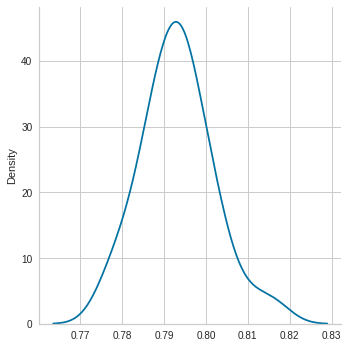

In [143]:
sns.displot(resultados_arvore, kind = 'kde');

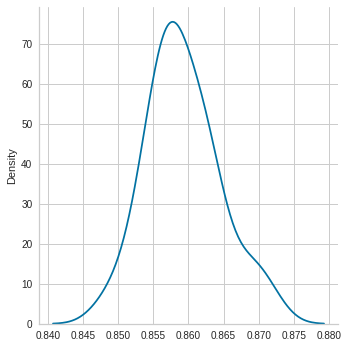

In [144]:
sns.displot(resultados_random_forest, kind = 'kde');

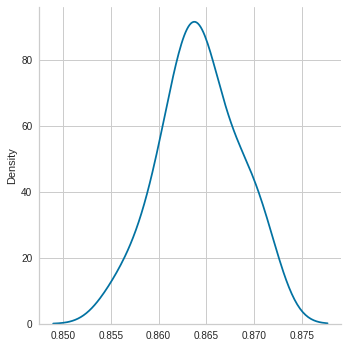

In [145]:
sns.displot(resultados_knn, kind = 'kde');

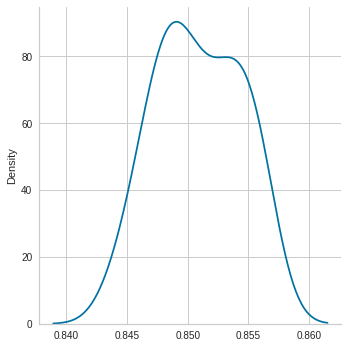

In [146]:
sns.displot(resultados_logistica, kind = 'kde');

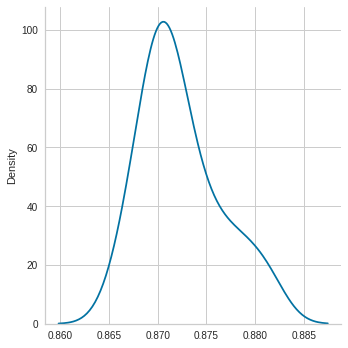

In [147]:
sns.displot(resultados_svm, kind = 'kde');

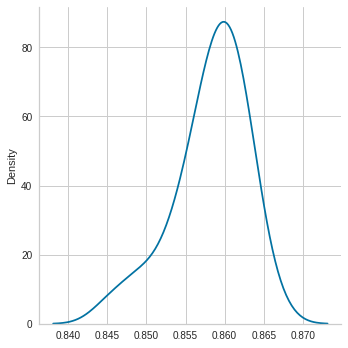

In [148]:
sns.displot(resultados_rede_neural, kind = 'kde');

## Teste de hipótese com a ANOVA e Tukey  /Comparativo de Resultados

Esse tipo de teste é utilizado quando queremos fazer o comparativo entre 3 ou mais grupos quando se tem amostras independentes, quando um conjunto de valores é independente dos outros valores;

Podemos utilizar uma variavel quantitativa e um ou mais váriavel categóricas;

Os dados devem estar na distribuição normal;

O objetivo é comprar a variação dentro do próprio grupo de valores e depois comparar a variação com os outros grupos;

In [149]:
from scipy.stats import f_oneway

In [150]:
_, p = f_oneway(resultados_arvore, resultados_random_forest, resultados_knn, resultados_logistica, resultados_svm, resultados_rede_neural)

In [151]:
alpha = 0.05 
if p <= alpha:
  print('Hipótese nula rejeitada. Dados são diferentes')
else:
  print('Hipótese alternativa rejeitada. Resultados são iguais')

Hipótese nula rejeitada. Dados são diferentes


In [152]:
resultados_algoritmos = {'accuracy': np.concatenate([resultados_arvore, resultados_random_forest, resultados_knn, resultados_logistica, resultados_svm, resultados_rede_neural]),
                             'algoritmo':['arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore', 
    'random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest',
                              'knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn',                              'logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica',
                              'svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm',                              'rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural']}

In [153]:
resultados_df = pd.DataFrame(resultados_algoritmos)
resultados_df

,accuracy,algoritmo
0,0.795210,arvore
1,0.784257,arvore
2,0.780936,arvore
3,0.796226,arvore
4,0.799510,arvore
...,...,...
175,0.861670,rede_neural
176,0.861634,rede_neural
177,0.862637,rede_neural
178,0.859520,rede_neural


In [154]:
from statsmodels.stats.multicomp import MultiComparison

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



In [155]:
compara_algoritmos = MultiComparison(resultados_df['accuracy'], resultados_df['algoritmo'])

In [156]:
teste_estatistico = compara_algoritmos.tukeyhsd()
print(teste_estatistico)

       Multiple Comparison of Means - Tukey HSD, FWER=0.05        
    group1        group2    meandiff p-adj   lower   upper  reject
------------------------------------------------------------------
       arvore           knn   0.0711  0.001  0.0671   0.075   True
       arvore     logistica   0.0577  0.001  0.0537  0.0616   True
       arvore random_forest    0.066  0.001  0.0621    0.07   True
       arvore   rede_neural    0.065  0.001   0.061  0.0689   True
       arvore           svm   0.0791  0.001  0.0752  0.0831   True
          knn     logistica  -0.0134  0.001 -0.0173 -0.0095   True
          knn random_forest   -0.005 0.0043 -0.0089 -0.0011   True
          knn   rede_neural  -0.0061  0.001   -0.01 -0.0022   True
          knn           svm   0.0081  0.001  0.0041   0.012   True
    logistica random_forest   0.0084  0.001  0.0044  0.0123   True
    logistica   rede_neural   0.0073  0.001  0.0033  0.0112   True
    logistica           svm   0.0215  0.001  0.0175  0.0254   

In [157]:
resultados.mean()

Arvore           0.793202
Random forest    0.859249
KNN              0.864260
Logistica        0.850872
SVM              0.872324
Rede neural      0.858156
dtype: float64

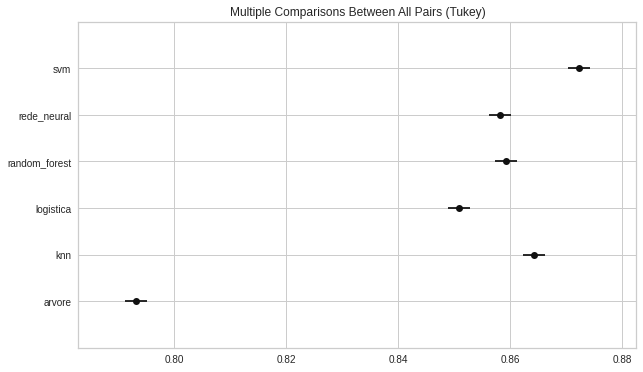

In [158]:
teste_estatistico.plot_simultaneous();

Tivemos no SVM melhor resultado, sendo um algoritimo de aprendizagem de máquina supervisionado e de classificação funcionou bem por seu um conjunto de dados menor, sendo muito bom para a criação de um modelo.



O dataframe é pequeno, mas para praticar acaba sendo bom, num caso de análise clinica necessitariamos de mais dados, atributos para uma análise mais profunda fazendo com que os código possam ser melhor aplicados e fazer uma separação maior em seus dados.


Poderiamos utilizar mais algoritimos para fazermos mais análise, como a Deep Learning a fim de realizarmos mais testes o que demandaria mais tempo.

Poderíamos também utilizar os clusters neste caso para fazermos um agrupamento dos grupos e quais os níveis potênciais de riscos coms suas características.

Há disversas possibilidades na ci~encia de dados que podemos e vemos utilizar para experimento, sendo uma ciencia devemos fazer análises com tudo que está em nosso alcance para alcançarmos os melhores resultados, mas é claro des que o algoritimo seja plausivel que o caso em estudo, neste caso eu particularmente não acho que seria conveniente utilizar o prophet.